In [35]:
from src.helper import load_pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

#### Combine train data for EDA 

In [22]:
X_train = load_pickle("data/processed/X_train.pkl")
y_train = load_pickle("data/processed/y_train.pkl")

In [23]:
dataset = pd.concat([X_train, y_train], axis = 1)
dataset

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
185640,315203,Cash loans,F,N,135000.0,599778.0,28984.5,477000.0,0
266989,409335,Cash loans,F,N,112500.0,152820.0,18135.0,135000.0,0
37682,143649,Cash loans,M,Y,202500.0,540000.0,21546.0,540000.0,0
280087,424501,Cash loans,F,N,157500.0,1350000.0,37255.5,1350000.0,0
255967,396187,Cash loans,F,Y,180000.0,410476.5,37777.5,373500.0,0
...,...,...,...,...,...,...,...,...,...
206264,339077,Cash loans,F,N,112500.0,405000.0,22099.5,405000.0,0
123969,243760,Cash loans,F,Y,112500.0,1288350.0,37669.5,1125000.0,0
116922,235582,Cash loans,M,N,157500.0,117000.0,14013.0,117000.0,1
118218,237081,Cash loans,F,N,270000.0,900000.0,47952.0,900000.0,0


#### Drop ID Cols 

In [24]:
dataset = dataset.drop(["SK_ID_CURR"], axis = 1)

#### Check missing values 

In [25]:
dataset.isna().sum()

NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
TARGET                0
dtype: int64

#### Check datatype 

In [26]:
dataset.dtypes

NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
AMT_GOODS_PRICE       float64
TARGET                  int64
dtype: object

#### Check stats information

In [27]:
dataset.skew()

/tmp/ipykernel_759/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


AMT_INCOME_TOTAL    2.716296
AMT_CREDIT          1.233825
AMT_ANNUITY         1.199859
AMT_GOODS_PRICE     1.311878
TARGET              3.099187
dtype: float64

#### Check data distribution 

In [28]:
num_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]

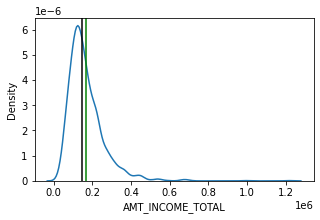

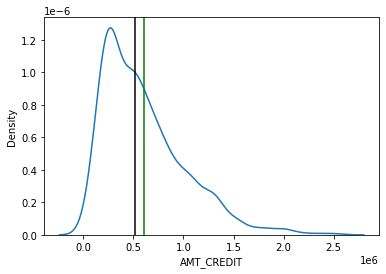

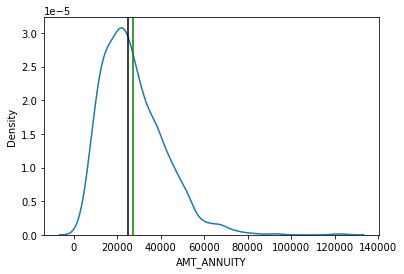

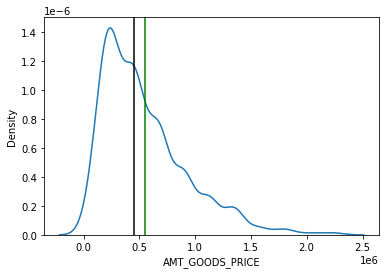

In [29]:
plt.figure(figsize=(5, 3))

for col in num_cols:
    sns.kdeplot(data = dataset, x = col)
    plt.axvline(dataset[col].mean(), 0, 1, color = "g")
    plt.axvline(dataset[col].median(), 0, 1, color = "k")
    plt.show()

#### Check correlation 

<AxesSubplot:>

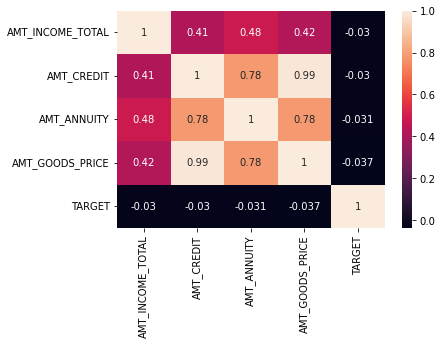

In [30]:
sns.heatmap(dataset.corr(), annot=True)

#### Check Variable Selection in Categorical cols 

In [31]:
pd.crosstab(dataset["CODE_GENDER"], dataset["TARGET"])

TARGET,0,1
CODE_GENDER,,
F,992,73
M,480,55


In [32]:
pd.crosstab(dataset["NAME_CONTRACT_TYPE"], dataset["TARGET"])

TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,1351,117
Revolving loans,121,11


In [39]:
chisquare(pd.crosstab(dataset["FLAG_OWN_CAR"], dataset["TARGET"]))

Power_divergenceResult(statistic=array([116.4375 ,  30.03125]), pvalue=array([3.81205177e-27, 4.25139441e-08]))

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

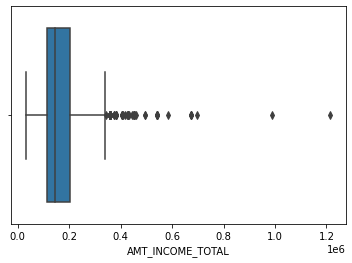

In [41]:
sns.boxplot(data = dataset, x="AMT_INCOME_TOTAL")

<AxesSubplot:xlabel='AMT_CREDIT'>

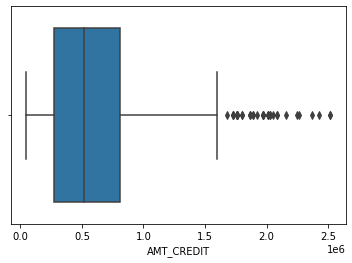

In [42]:
sns.boxplot(data = dataset, x="AMT_CREDIT")

<AxesSubplot:xlabel='AMT_ANNUITY'>

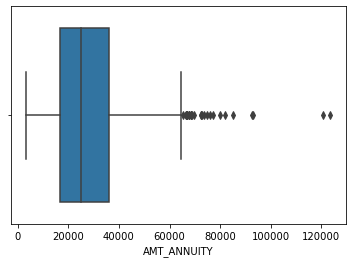

In [43]:
sns.boxplot(data = dataset, x="AMT_ANNUITY")

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

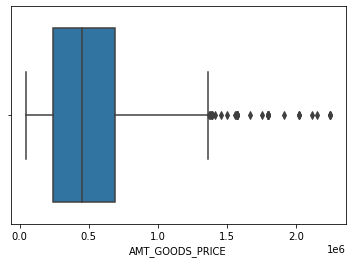

In [44]:
sns.boxplot(data = dataset, x="AMT_GOODS_PRICE")

#### Conclusion
- ada beberapa outliers di numerical data, tapi yg paling parah ada di `AMT_INCOME_TOTAL`
- untuk outliers nya beberapa bisa kita treat, tapi karena goals nya untuk belajar coba - coba untuk sementara tidak di treat dulu
- untuk numerical data nya, tidak ada korelasi dengan target class. menarik
- sebenernya masih pengen coba buat explore "Feature Selection" pake chisquare buat data categorical